<a href="https://colab.research.google.com/github/Matilda045/PREDICTING-CUSTOMER-CHURN---RANDOM-FOREST/blob/main/Customer_churn_prediction_RandomForest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING CUSTOMER CHURN**

**Problem Statement**

This project aims to develop a predictive model that can accurately identify customers who are likely to churn from a business by analyzing data from customer demographics, transaction history, customer service interactions, and online activity.

**Background**

Customer churn is the rate at which customers stop doing business with an entity, is a critical concern for businesses across various sectors.  Acquiring new customers is often significantly more expensive than retaining existing ones.  Therefore, understanding why customers churn and being able to predict which customers are at high risk of churning is crucial for business sustainability and profitability.

**Dataset Description**

The dataset describes customer behavior and transactional history for a retail store. It contains the following features for each customer:

Customer ID: A unique identifier for each customer.

Age: The customer's age.

Gender: The customer's gender.

Income Level: The customer's income level (categorized into Low, High, Medium).

Marital Status: The customer's marital status.

Transaction ID: A unique identifier for each transaction.

Transaction Date: The date of the transaction.

Amount Spent: The amount spent in the transaction.

Product Category: The category of the product purchased.

Last Login Date: The date of the customer's last login.

Service Usage: A measure of the customer's usage of the service.

Login Frequency: How often the customer logs in.

Churn Status: A binary variable indicating whether the customer has churned (that is 1 for churned, 0 for active).

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import statements

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

## **Data Loading and Initial Exploration**

In [6]:
# Creating the dataframe
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/customer_churn_data.csv")

In [7]:
# Reviewing data types..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        6812 non-null   int64  
 1   Age               6812 non-null   int64  
 2   Gender            6812 non-null   object 
 3   MaritalStatus     6812 non-null   object 
 4   IncomeLevel       6812 non-null   object 
 5   TransactionID     6812 non-null   int64  
 6   TransactionDate   6812 non-null   object 
 7   AmountSpent       6812 non-null   float64
 8   ProductCategory   6812 non-null   object 
 9   InteractionID     5204 non-null   float64
 10  InteractionDate   5204 non-null   object 
 11  InteractionType   5204 non-null   object 
 12  ResolutionStatus  5204 non-null   object 
 13  LastLoginDate     6812 non-null   object 
 14  LoginFrequency    6812 non-null   int64  
 15  ServiceUsage      6812 non-null   object 
 16  ChurnStatus       6812 non-null   int64  


In [8]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,3/27/2022,416.50,Electronics,6363.0,3/31/2022,Inquiry,Resolved,10/21/2023,34,Mobile App,0
1,2,65,M,Married,Low,7250,8/8/2022,54.96,Clothing,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
2,2,65,M,Married,Low,9660,7/25/2022,197.50,Electronics,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
3,2,65,M,Married,Low,2998,1/25/2022,101.31,Furniture,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1
4,2,65,M,Married,Low,1228,7/24/2022,397.37,Clothing,3329.0,3/17/2022,Inquiry,Resolved,12/5/2023,5,Website,1


In [9]:
df.tail()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
6807,1000,34,M,Widowed,Low,2724,9/8/2022,232.06,Groceries,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,12/13/2022,324.98,Books,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,6/15/2022,375.34,Groceries,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,4/8/2022,166.73,Books,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0
6811,1000,34,M,Widowed,Low,5529,11/23/2022,93.73,Furniture,NaN,NaN,NaN,NaN,8/13/2023,22,Mobile App,0


In [10]:
# checking for null columns

df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
MaritalStatus,0
IncomeLevel,0
TransactionID,0
TransactionDate,0
AmountSpent,0
ProductCategory,0
InteractionID,1608


## **Data Cleaning and Preprocessing**

**Removing Irregularities**

In [11]:
#  Fill missing numerical values with the median and categorical values with the mode.
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that missing values have been addressed
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 CustomerID          0
Age                 0
Gender              0
MaritalStatus       0
IncomeLevel         0
TransactionID       0
TransactionDate     0
AmountSpent         0
ProductCategory     0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
LastLoginDate       0
LoginFrequency      0
ServiceUsage        0
ChurnStatus         0
dtype: int64


<ipython-input-11-a899819b761e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-11-a899819b761e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [12]:
# Encoding Categorical Variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Label encode 'gender' (binary)


# One-Hot Encode other categorical features:

df = pd.get_dummies(df, columns=['ProductCategory', 'MaritalStatus', 'IncomeLevel', 'InteractionType', 'ResolutionStatus', 'ServiceUsage'],
                    prefix=['product', 'marital', 'income', 'interaction', 'resolution', 'service'])


#  Feature Scaling (for numerical features)

numerical_cols = ['Age', 'AmountSpent', 'LoginFrequency']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])  # Scales features to have mean 0 and std dev 1.

In [13]:
# Convert the date columns to datetime format to allow for mathematical functions (adjust the column names if necessary)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])

# Using the maximum date found in the dataset as the reference
reference_date = df[['InteractionDate', 'LastLoginDate']].max().max()

# Calculate recency features: the number of days since the last interaction and last login
df['DaysSinceTransaction'] = (reference_date - df['TransactionDate']).dt.days
df['DaysSinceInteraction'] = (reference_date - df['InteractionDate']).dt.days
df['DaysSinceLastLogin'] = (reference_date - df['LastLoginDate']).dt.days

## **Exploratory Data Analysis**

In [14]:
# summary statistics
df.describe()

,CustomerID,Age,Gender,TransactionID,TransactionDate,AmountSpent,InteractionID,InteractionDate,LastLoginDate,LoginFrequency,ChurnStatus,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLastLogin
count,6812.000000,6.812000e+03,6812.000000,6812.000000,6812,6.812000e+03,6812.000000,6812,6812,6.812000e+03,6812.000000,6812.000000,6812.000000,6812.000000
mean,500.169260,1.783658e-16,0.474457,5497.323253,2022-07-01 02:11:29.136817408,4.172300e-18,5917.408984,2022-06-07 05:05:40.340575232,2023-07-06 04:56:47.633587712,4.485223e-17,0.198473,547.908691,571.787728,177.793893
min,1.000000,-1.653478e+00,0.000000,1000.000000,2022-01-01 00:00:00,-1.724672e+00,2015.000000,2022-01-01 00:00:00,2023-01-01 00:00:00,-1.758361e+00,0.000000,365.000000,366.000000,0.000000
25%,247.000000,-8.684290e-01,0.000000,3223.500000,2022-04-02 00:00:00,-8.714359e-01,4479.000000,2022-03-20 00:00:00,2023-04-12 00:00:00,-8.338177e-01,0.000000,457.000000,488.000000,91.000000
50%,505.500000,4.746175e-02,0.000000,5515.000000,2022-07-01 00:00:00,1.570936e-03,5903.000000,2022-05-11 00:00:00,2023-07-13 00:00:00,1.960671e-02,0.000000,548.000000,599.000000,171.000000
75%,750.000000,8.325109e-01,1.000000,7675.250000,2022-09-30 00:00:00,8.654100e-01,7293.000000,2022-08-30 00:00:00,2023-10-01 00:00:00,8.730311e-01,0.000000,638.000000,651.000000,263.000000
max,1000.000000,1.682981e+00,1.000000,9997.000000,2022-12-31 00:00:00,1.737262e+00,9997.000000,2022-12-30 00:00:00,2023-12-31 00:00:00,1.655337e+00,1.000000,729.000000,729.000000,364.000000
std,286.704642,1.000073e+00,0.499384,2584.768541,NaN,1.000073e+00,2038.520385,NaN,NaN,1.000073e+00,0.398880,104.690686,99.737192,104.145325


In [15]:
# exploring the "ChurnStatus" -the target

df["ChurnStatus"]

,ChurnStatus
0,0
1,1
2,1
3,1
4,1
...,...
6807,0
6808,0
6809,0
6810,0


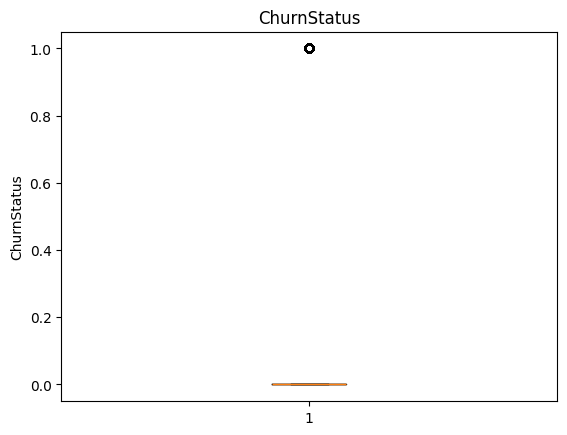

In [16]:
# box plot of the "ChurnStatus" column

plt.boxplot(df["ChurnStatus"])
plt.title("ChurnStatus")
plt.ylabel("ChurnStatus")
plt.show()

In [17]:
#correlation heatmap of numerical columns in the dataset

df.select_dtypes("number").corr()

,CustomerID,Age,Gender,TransactionID,AmountSpent,InteractionID,LoginFrequency,ChurnStatus,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLastLogin
CustomerID,1.000000,0.025082,0.010883,-0.000502,-0.029580,-0.025416,0.008325,-0.025158,0.038517,0.008619,-0.041051
Age,0.025082,1.000000,-0.014314,-0.000850,0.008301,-0.018083,-0.011603,0.045048,0.013502,-0.000234,-0.045694
Gender,0.010883,-0.014314,1.000000,-0.006779,0.000404,0.025358,0.073805,0.040196,0.013101,0.077686,0.000040
TransactionID,-0.000502,-0.000850,-0.006779,1.000000,-0.010189,-0.001052,-0.006556,-0.008736,0.010443,0.007565,-0.007320
AmountSpent,-0.029580,0.008301,0.000404,-0.010189,1.000000,-0.002286,0.028168,0.005113,0.011841,-0.019130,0.036905
InteractionID,-0.025416,-0.018083,0.025358,-0.001052,-0.002286,1.000000,-0.011154,0.020633,0.022386,0.049380,0.017323
LoginFrequency,0.008325,-0.011603,0.073805,-0.006556,0.028168,-0.011154,1.000000,-0.100391,0.001032,-0.008881,0.007310
ChurnStatus,-0.025158,0.045048,0.040196,-0.008736,0.005113,0.020633,-0.100391,1.000000,-0.006527,0.069615,0.031073
DaysSinceTransaction,0.038517,0.013502,0.013101,0.010443,0.011841,0.022386,0.001032,-0.006527,1.000000,0.014474,-0.007985
DaysSinceInteraction,0.008619,-0.000234,0.077686,0.007565,-0.019130,0.049380,-0.008881,0.069615,0.014474,1.000000,0.014704


<Axes: >

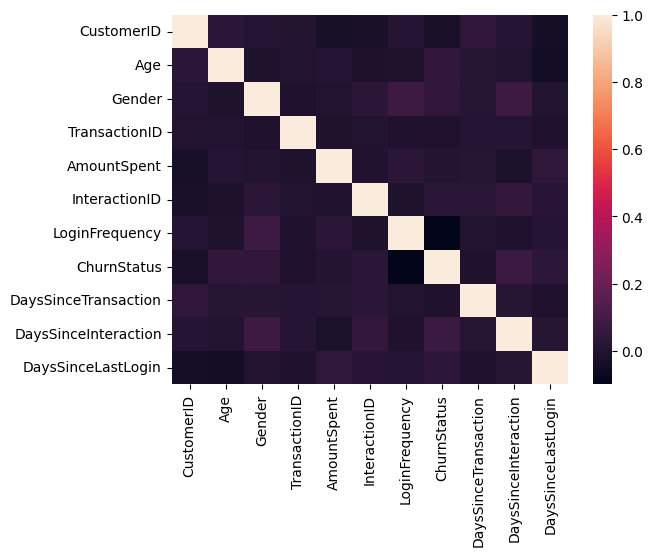

In [18]:
# Plotting heatmap to view and detect columns with strong relationship

sns.heatmap(df.select_dtypes("number").corr())

## **Decide on Most Appropriate Machine Learning Model**


A RandomForest regression model will be used since we are using multiple columns for the feature matrix and RFM gives you a measure of how important each feature is in predicting churn. Also customer behavior is rarely linear; the relationship between "time since last interaction" and churn risk might not be a straight line.

**Train and Test the Model**

['DaysSinceLastLogin', 'LoginFrequency', 'Age', 'DaysSinceInteraction', 'AmountSpent', 'DaysSinceTransaction', 'Gender', 'income_Medium', 'marital_Divorced', 'marital_Widowed']


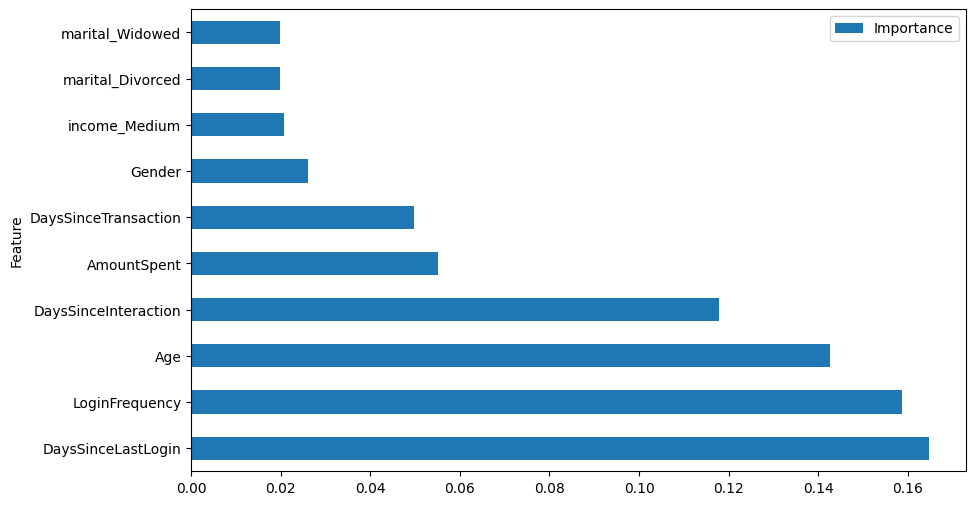

In [19]:
# Taking 'ChurnStatus' as the target variable
# Drop non-predictive columns
X = df.drop(columns=['ChurnStatus', 'CustomerID', 'TransactionID', 'TransactionDate', 'InteractionID', 'InteractionDate', 'LastLoginDate'])
y = df['ChurnStatus']

# Initial Random Forest for Feature Importance:
rf_initial = RandomForestClassifier(random_state=42)
rf_initial.fit(X, y)  # Train on all features to get initial importances
feature_importances = rf_initial.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
selected_features = importance_df['Feature'][:10].tolist()  # Select top 10 features
X_selected = X[selected_features]  # DataFrame with only selected features


# Print or visualize the selected feature importances
print(selected_features)
# or
# Instead of plotting X_selected, plot importance_df filtered for selected features
importance_df[importance_df['Feature'].isin(selected_features)].plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()



In [20]:
# Split data using selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [21]:
#  Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# **Create Model and Evaluate its Performance**

**Baselining**

In [22]:
# Let's create a baseline model

baseline_model = y_train_smote.mean()

#baseline_model = y_train.mean()

baseline_model

0.5

In [23]:
# let's create predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

In [24]:
# MAE for baseline model

from sklearn.metrics import mean_absolute_error
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean value of y_train_smote values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of y_train_smote values is: 0.5
The baseline MAE is: 0.5


**Creating a RandomForest regression and Fitting/Training The Model**

In [26]:
#  Train the final Random Forest with SMOTE and selected features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### **Test Model With Training Data**

In [27]:
# we'd generate predictions using X_train

model_train_pred = model.predict(X_train_smote)

model_train_pred

array([0, 1, 0, ..., 1, 1, 1])

**Evaluate Model Perfomance I**

In [28]:
# Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train_smote, model_train_pred)

round(model_train_mae, 3)

0.0

**Compare Baseline MAE with Model's training MAE**

In [29]:
# print baseline and model (train) mae to compare both

print("The baseline |MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))

The baseline |MAE is:		 0.5
The model (train) MAE is:	 0.0


**Test Model With Training Data**

In [30]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

y_proba = model.predict_proba(X_test)[:, 1]

**Evaluate Model Perfomance II**

In [31]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

0.01


### **Compare Baseline MAE, Model testing MAE and Model training MAE**

In [32]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model (train) MAE is:\t", round(model_train_mae, 3))
print("The model (test) MAE is:\t", round(model_test_mae, 3))

The baseline MAE is:		 0.5
The model (train) MAE is:	 0.0
The model (test) MAE is:	 0.01


### **Comparing Baseline Accuracy with Random Forest Accuracy**

In [33]:
# Baseline: predicting the most frequent class

most_frequent_class = y_train_smote.mode()[0]  # Get the most frequent class from training data
y_baseline = [most_frequent_class] * len(y_test)  # Create baseline predictions

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_baseline)

# Calculate Random Forest accuracy
rf_accuracy = accuracy_score(y_test,model_test_pred)

print("Baseline Accuracy:", baseline_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Compare the two accuracies to see if Random Forest performs better than the baseline

Baseline Accuracy: 0.8151137197358768
Random Forest Accuracy: 0.9904622157006603


### **Model Performance Assessment (Classification)**

This evaluates the performance of the Random Forest classification model (churn /not churn). It prints a classification report (including precision, recall, F1-score, and support), a confusion matrix (showing the counts of true and predicted classes), and the ROC-AUC score (measuring the model's ability to distinguish between classes).  These metrics provide a comprehensive assessment of the model's predictive capabilities.

In [34]:
print("Classification Report:\n", classification_report(y_test, model_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, model_test_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1111
           1       0.98      0.97      0.97       252

    accuracy                           0.99      1363
   macro avg       0.98      0.98      0.98      1363
weighted avg       0.99      0.99      0.99      1363

Confusion Matrix:
 [[1105    6]
 [   7  245]]
ROC-AUC Score: 0.997987298729873


# **Model Deployment**